# First step in EDA
> As our first step in the EDA we need to understand how to identify the areas considered to be aggregations (impurities) in our cast-leaf images. <br>
>Working with our SME I identified that this would be possible by using the colors in our images. 
<br>To that end using a KMeans is the best approach to identify group of colors in our images and derive which is the RGB threshold to be considered an aggregation

# Load the images
> We are loading only the images that start with IDC since these images are the ones that have been preselected by our SME. <br>
These cast-leaf samples the the ones considered to be of the worst quality and the ones where the holes and impurities (aggregations) are the worst. <br>
These makes the finding of centroids to identify the areas of aggregations the easiest

In [1]:
# get all the files in the folder
import pandas as pd
import numpy as np
import glob
import random
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image 
from sklearn.cluster import KMeans
import os


jpgfiles = []
jpgfile_names = []
for file in glob.glob("images/IDC*.jpg"):
    jpgfiles.append(file)

sample_images = jpgfiles

# Find the Centroids
> I tested different values for the clusters and after validation with SME 5 was the one that best separated what were aggreations and holes and areas not considered of bad quality

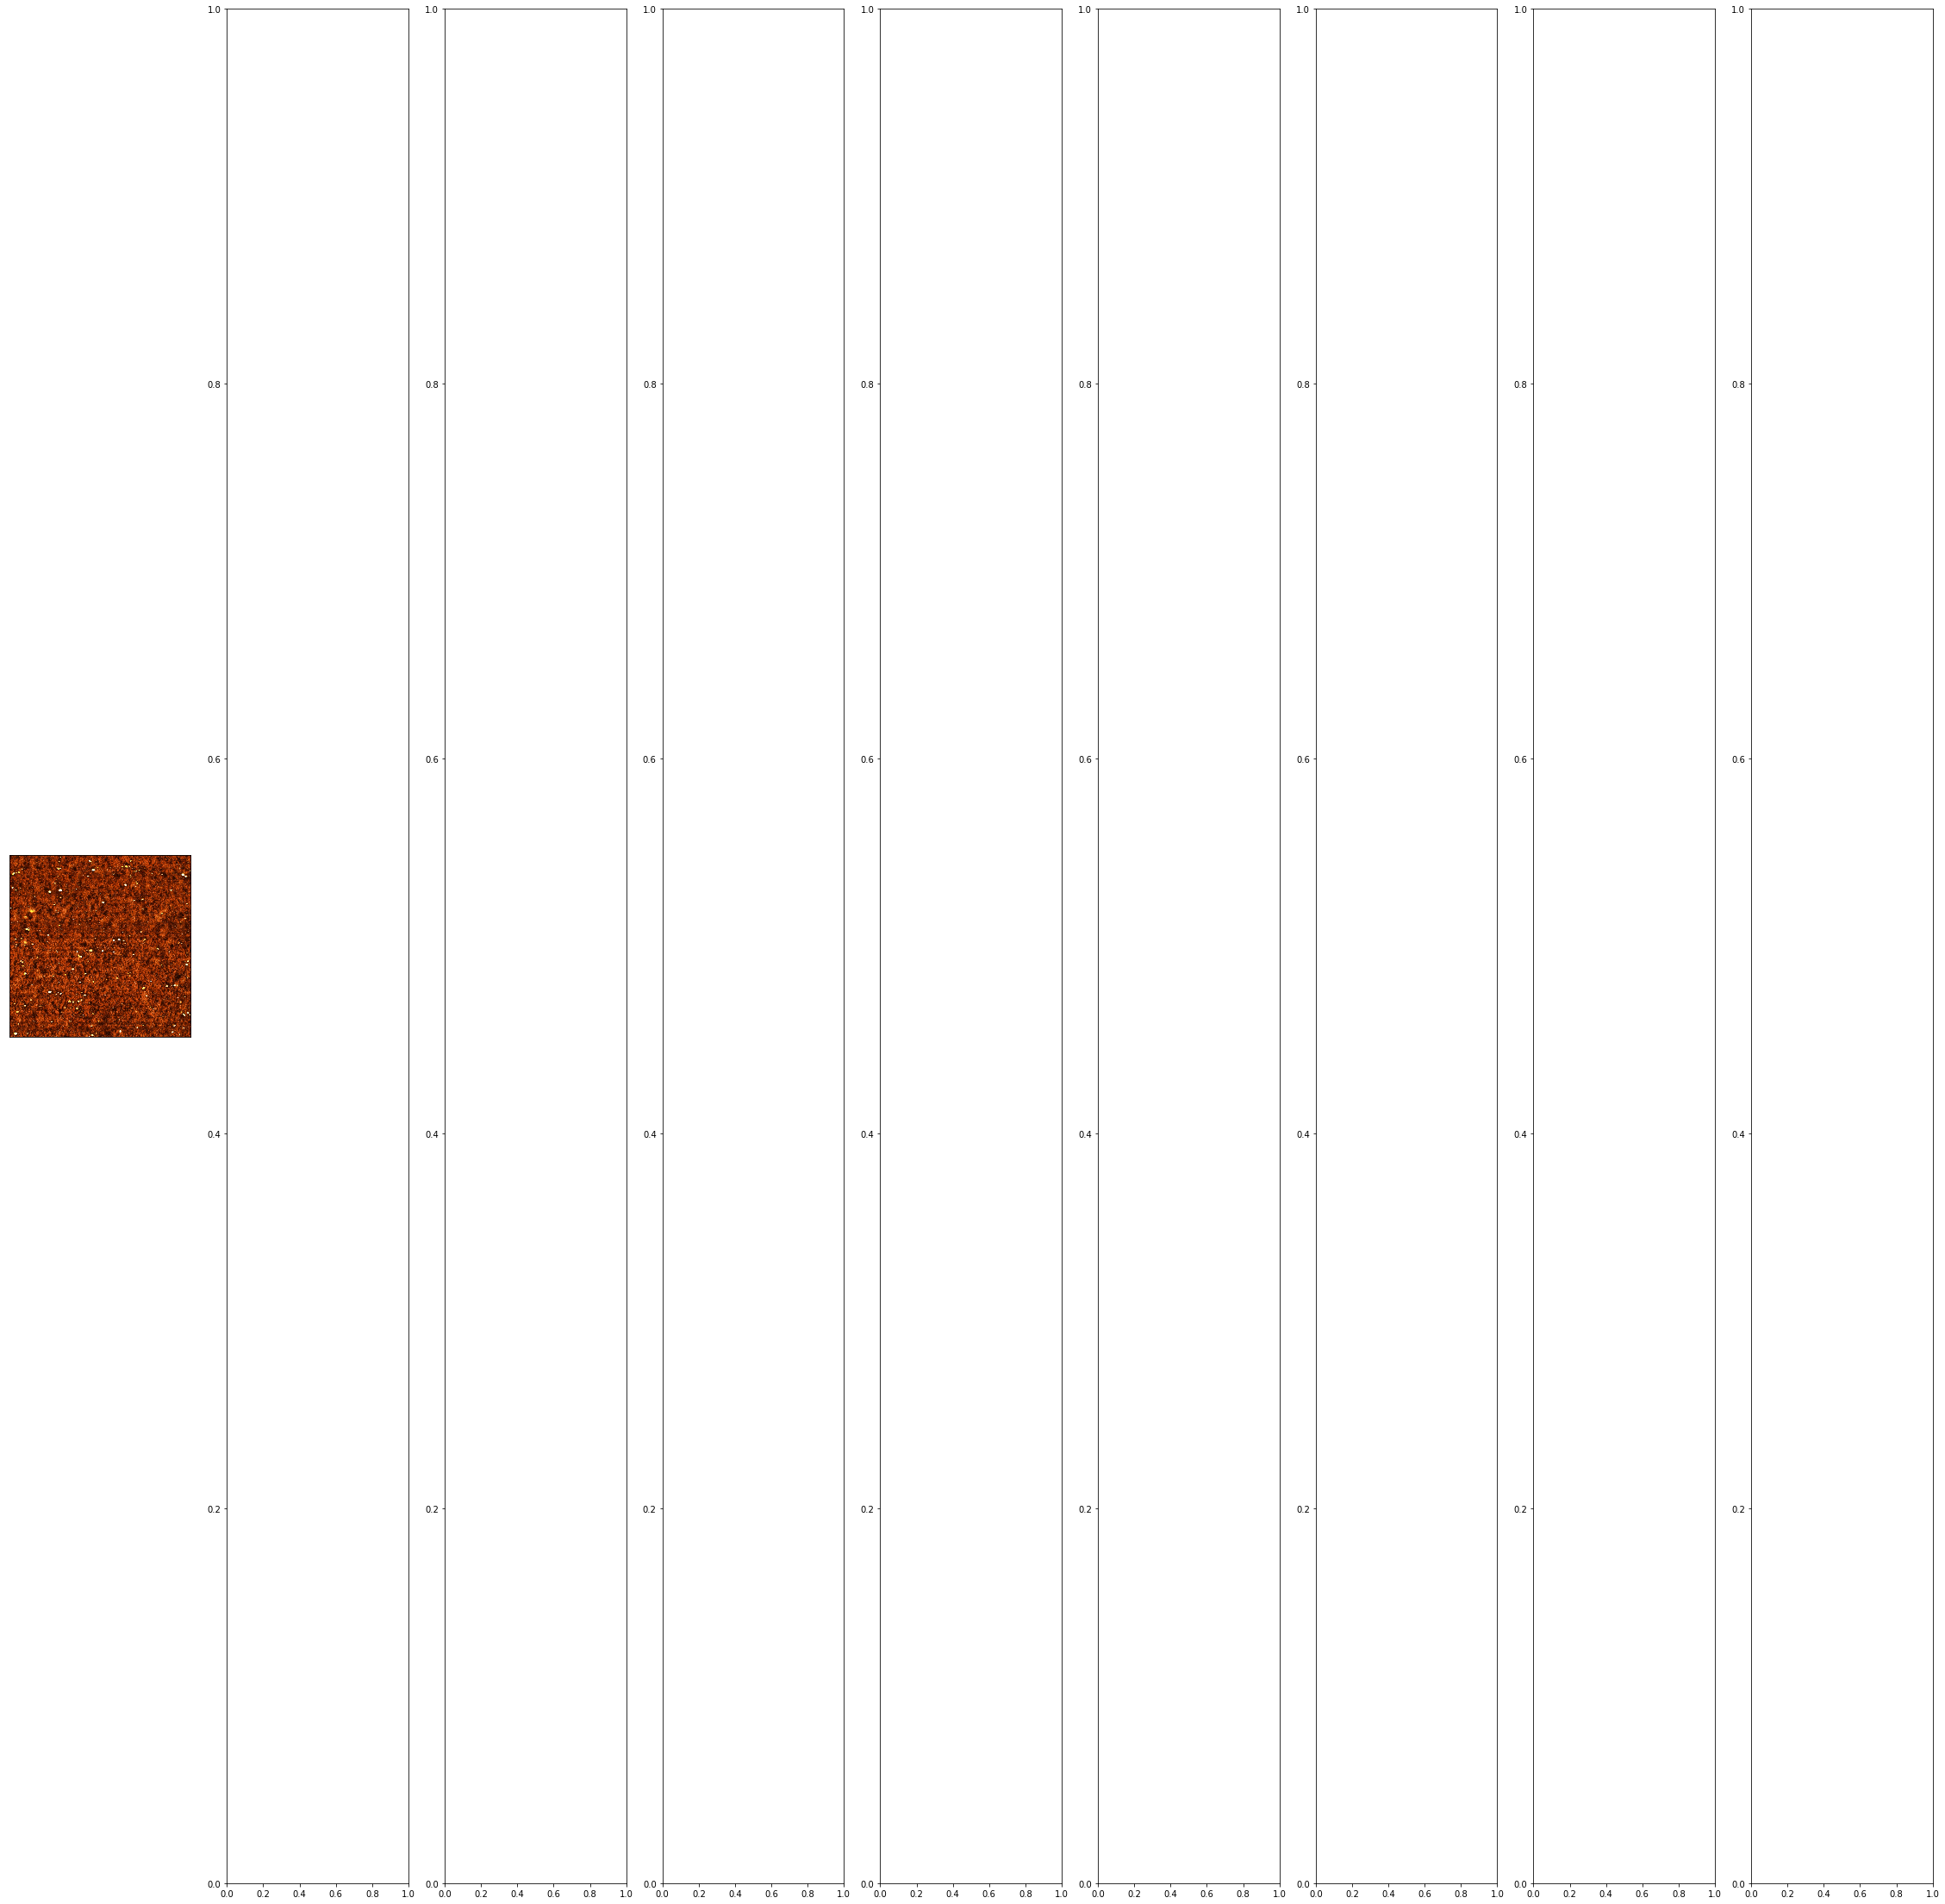

In [3]:
fig, ax = plt.subplots(1, len(sample_images), figsize=(40, 40))

centroids_int_list = []
centroids_list = []

for i in range(len(sample_images)):
    img = Image.open(sample_images[i])
    ax[i].imshow(img)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].axes.get_yaxis().set_visible(False)
    
    img_array = np.array(img)
    X = img_array.reshape(-1, 3)

    # Create k-means object
    kmeans_img = KMeans(
        n_clusters=5,
        random_state=0 
    )
    # Fit it to the data
    kmeans_img.fit(X, y=None)
    
    centroids = kmeans_img.cluster_centers_
    centroids_list.append(centroids)
    centroids_int = kmeans_img.cluster_centers_.astype(int)
    centroids_int_list.append(centroids_int)
    break
    
plt.show()

In [ ]:
fig, ax = plt.subplots(9, 1, figsize=(20, 20))

for j in range(len(sample_images)):
    centroid_rgb = centroids_int_list[j]
    ax[j].imshow(centroid_rgb[np.array([[0, 1, 2, 3, 4]])])
    ax[j].axes.get_xaxis().set_visible(False)
    ax[j].axes.get_yaxis().set_visible(False)

# Plot the RBG channels of the Centroids
> We first do a 3D plot of the RGB channels of the centroids. We can appreciate that the Blue channel gets only activated when there is a high value of for the green channel.

(0, 150)

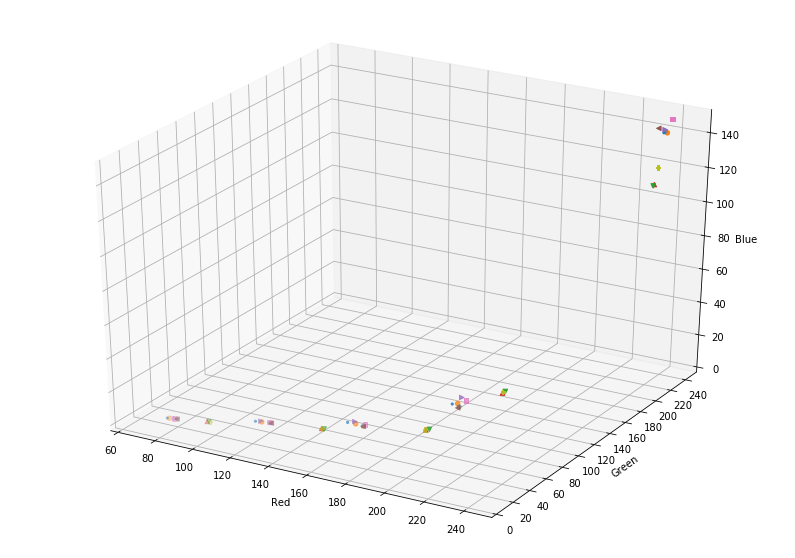

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# %matplotlib widget

def column(matrix, i):
    return [row[i] for row in matrix]

markers = ['.', 'o', 'v', '^', '>', '<', 's', 'p', 'P', '*']

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

for j in range(len(sample_images)):
    centroid_rgb = centroids_list[j]
    r = column(centroid_rgb, 0)
    g = column(centroid_rgb, 1)
    b = column(centroid_rgb, 2)
    ax.scatter3D(r, g, b, marker=markers[j])
#     ax.scatter(r, g, b, marker=".")

plt.xticks(np.arange(60, 250, 20))
plt.yticks(np.arange(0, 250, 20))
# plt.zticks(np.arange(0, 250, 20))

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

ax.set(xlim=(60, 250), ylim=(0, 250))
ax.set_zlim(0,150)


In [26]:
df_centroid_list = pd.DataFrame()
for j in range(len(sample_images)):
    centroid_rgb = centroids_int_list[j]
    df_centroid_list = df_centroid_list.append(pd.DataFrame(centroid_rgb), ignore_index= True)

## Print each channel against each other
> We can see in more detail that the plot of GxR and BxR are very similar and that the Blue and Green relationship follow something of a linear relationship

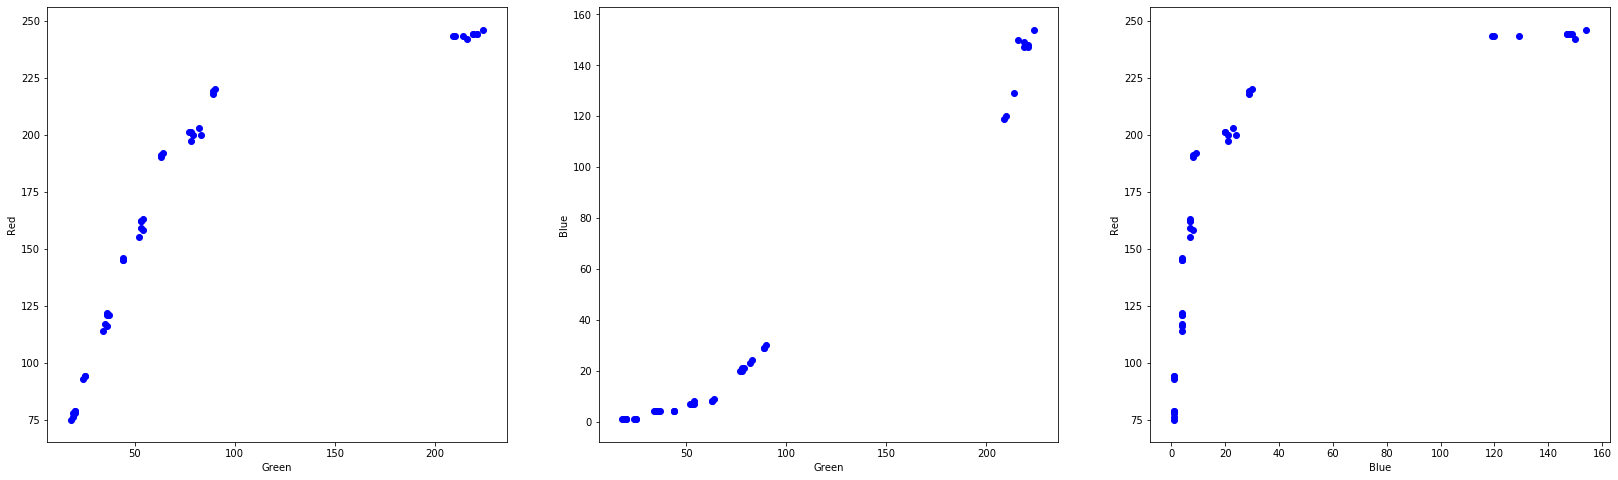

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(28, 8))

for centroid_rgb_n in df_centroid_list.values:
        r = centroid_rgb_n[0] 
        g = centroid_rgb_n[1]
        b = centroid_rgb_n[2]
        ax[0].scatter(g, r, c="blue")
        ax[0].set_xlabel('Green')
        ax[0].set_ylabel('Red')
        
        ax[1].scatter(g, b, c="blue")
        ax[1].set_xlabel('Green')
        ax[1].set_ylabel('Blue')
        
        ax[2].scatter(b, r, c="blue")
        ax[2].set_xlabel('Blue')
        ax[2].set_ylabel('Red')

> We can create a correlation matrix to verify the relationship between the channels and as we expected the Green and Blue channel are highly correlated.<br>
We can either use the GxR or BxR plots to better visualize the diferent centroids.

In [25]:
df_centroid_list.rename(columns={0: "r", 1: "g", 2:'b'}, inplace=True)
df_centroid_list.corr(method ='pearson') 



,r,g,b
r,1.000000,0.858058,0.759399
g,0.858058,1.000000,0.983340
b,0.759399,0.983340,1.000000


# Plot Green vs Red channels
> I choose plot to better visualize the different centroids given that of the 2 this one better separated the centroids

[(50, 250), (0, 250)]

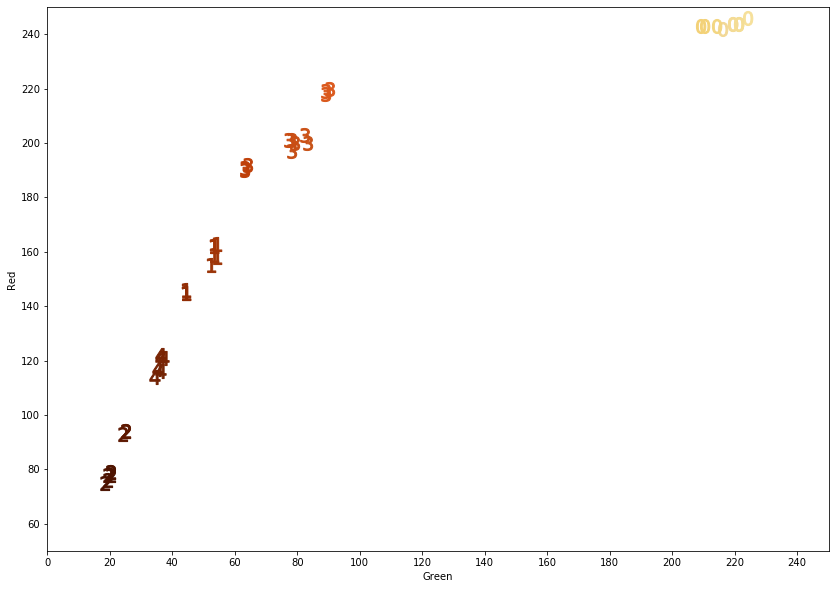

In [45]:
km = KMeans(n_clusters=5, random_state=0)
km.fit(df_centroid_list)
df_centroid_list['cluster'] = km.labels_


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

for centroid_rgb_n in df_centroid_list.values:
    r = centroid_rgb_n[0]
    g = centroid_rgb_n[1]
    b = centroid_rgb_n[2]
    cluster = centroid_rgb_n[3]
    color = '#%02x%02x%02x' % tuple(centroid_rgb_n[0:3])
    ax.scatter(g, r, marker="${}$".format(cluster), c=color, s=200)

plt.xticks(np.arange(0, 250, 20))
plt.yticks(np.arange(0, 250, 20))

ax.set_xlabel('Green')
ax.set_ylabel('Red')

ax.set(xlim=(0, 250), ylim=(50, 250))


In [10]:
r = df_centroid_list['r'].values
g = df_centroid_list['g'].values
b = df_centroid_list['b'].values
cluster = df_centroid_list['cluster'].values

np.savez('centroids.npz', r = r, g=g, b=b, cluster = cluster)